1. Write a python program which searches all the product under a particular product vertical
from www.amazon.in. The product verticals to be searched will be taken as input from user.
For e.g. If user input is ‘guitar’. Then search for guitars

In [1]:
#importing webdriver
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException

In [2]:
#Pasting the installed msedge path
driver=webdriver.Edge(executable_path=r'C:\Users\satvi\OneDrive\Documents\msedgedriver.exe')

In [109]:
#searching for amazon products
url='https://www.amazon.in/'
#getting url
driver.get(url)

In [110]:
#searching for the all products
search_all=driver.find_element_by_id("searchDropdownBox")
search_all


<selenium.webdriver.remote.webelement.WebElement (session="f30cb33da07f04922ec3c08c7e8f893d", element="45ef9ee6-1728-4a28-b0cc-5b0316af0648")>

In [111]:
search_product=driver.find_element_by_id("twotabsearchtextbox")
search_product.send_keys('laptops')

In [112]:
search_button=driver.find_element_by_xpath('//span[@class="nav-search-submit-text nav-sprite nav-progressive-attribute"]/input')
search_button.click()

2. In the above question, now scrape the following details of each product listed in first 3 pages 
of your search results and save it in a data frame and csv. In case if any product vertical has 
less than 3 pages in search results then scrape all the products available under that product 
vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of 
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" 
and “Product URL”. In case, if any of the details are missing for any of the product then 
replace it by “-“

In [113]:
#fetching Url's
urls=[]
for i in driver.find_elements_by_xpath('//li[@class="a-selected" or @class="a-normal"]/a'):
    urls.append(i.get_attribute('href'))
urls

['https://www.amazon.in/s?k=laptops&qid=1626889275&ref=sr_pg_1',
 'https://www.amazon.in/s?k=laptops&page=2&qid=1626889275&ref=sr_pg_2',
 'https://www.amazon.in/s?k=laptops&page=3&qid=1626889275&ref=sr_pg_3']

In [125]:
#Getting brand name
brand=[]
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        brandname=driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-base a-text-normal"]')
        for i in brandname:
            brand.append(i.text)
    except NoSuchElementException:
        brand.append('-')
brand

['Lenovo IdeaPad Slim 3 (2021) | Intel Core i3 11th Gen |14" FHD IPS |Thin & Light Laptop | 4-Side Narrow Bezel (8GB/256GB SSD/Win10/Office/Backlit KB/Fingerprint Reader/Arctic Grey/1.41kg), 82H700J8IN',
 'Lenovo IdeaPad Slim 3 2021 11th Gen Intel Core i5 15.6 FHD Thin & Light Laptop (8GB/512GB SSD/Windows 10/MS Office/Backlit Keyboard/2 Year Warranty/Arctic Grey/1.65Kg), 82H8014BIN',
 'Dell Inspiron 3502 15.6" (39.62 cms) HD Display Laptop (Pentium Silver N5030 / 4GB / 256GB SSD / Integrated Graphics / Win 10 + MSO / Accent Black) D560427WIN9BE',
 'HP 15 Entry Level 15.6-inch (39.62 cms) HD Laptop (AMD 3020e/4GB/1TB HDD/Windows 10 Home/Jet Black/1.74 Kg), 15s-gy0003AU',
 'ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core Intel Celeron N4020, Thin and Light Laptop (4GB RAM/256GB SSD/Integrated Graphics/Windows 10 Home/Transparent Silver/1.8 Kg), X515MA-BR002T',
 'HP 15 Intel Pentium Gold 6405U Processor Entry Level 15.6-inch (39.62 cms) FHD Laptop (4GB/1TB/Win 10/Jet Black/1.74kg), 15s-du

In [115]:
product_urls=[]
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        url=driver.find_elements_by_xpath('//a[@class="a-link-normal s-no-outline"]')
        for i in url:
            product_urls.append(i.get_attribute('href'))
    except NosuchElementException:
        product_urls.append('-')
        
product_urls

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A07661172IGHY6MI1QMIN&url=%2FLenovo-IdeaPad-Backlit-Fingerprint-82H700J8IN%2Fdp%2FB096SHTH39%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dlaptops%26qid%3D1626889300%26sr%3D8-1-spons%26psc%3D1&qualifier=1626889300&id=5158018814641609&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A00789752XWHV3ZBQ151N&url=%2FLenovo-IdeaPad-Keyboard-Warranty-82H8014BIN%2Fdp%2FB096359ZZG%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dlaptops%26qid%3D1626889300%26sr%3D8-2-spons%26psc%3D1&qualifier=1626889300&id=5158018814641609&widgetName=sp_atf',
 'https://www.amazon.in/HP-15-6-inch-Laptop-Windows-15s-gy0003AU/dp/B08RFTYKFZ/ref=sr_1_3?dchild=1&keywords=laptops&qid=1626889300&sr=8-3',
 'https://www.amazon.in/ASUS-VivoBook-Integrated-Transparent-X515MA-BR002T/dp/B08CKY5XX3/ref=sr_1_4?dchild=1&keywords=laptops&qid=1626889300&sr=8-4',
 'http

In [116]:
rating=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        productrating=driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-base"]')
        for i in productrating:
            rating.append(i.text)
    except NoSuchElementException:
         rating.append('-')
rating

['4.4 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '4 out of 5',
 '3.5 out of 5',
 '3.6 out of 5',
 '4.2 out of 5',
 '4.1 out of 5',
 '2.8 out of 5',
 '3.8 out of 5',
 '4.3 out of 5',
 '4.1 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '3.6 out of 5',
 '5 out of 5',
 '4.3 out of 5',
 '4.4 out of 5',
 '4.1 out of 5',
 '3.6 out of 5',
 '4.4 out of 5',
 '4 out of 5',
 '4 out of 5',
 '4 out of 5',
 '4.2 out of 5',
 '3.3 out of 5',
 '3.8 out of 5',
 '4 out of 5',
 '4 out of 5',
 '3.7 out of 5',
 '4.7 out of 5',
 '3.2 out of 5',
 '4.3 out of 5',
 '4.3 out of 5',
 '3.8 out of 5',
 '3.8 out of 5',
 '5 out of 5',
 '4.1 out of 5',
 '3.3 out of 5',
 '5 out of 5',
 '4.4 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '3.6 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '3.3 out of 5',
 '3.9 out of 5',
 '3.1 out of 5',
 '3.4 out of 5',
 '4.4 out of 5',
 '3.8 out of 5',
 '4 out of 5',
 '4.2 out of 5',
 '4.4 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '3.3 out of 5',
 '4.4 out of 5',
 '4.3 ou

In [117]:
product_brand=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        brand=driver.find_elements_by_xpath('//*[@id="productDetails_techSpec_section_1"]/tbody/tr[1]/td')
        for i in brand:
            product_brand.append(i.text)
    except NoSuchElementException:
        product_brand.append('-')
product_brand


['Lenovo',
 'Lenovo',
 'HP',
 'ASUS',
 'HP',
 'HP',
 'HP',
 'HP',
 'Lenovo',
 'HP',
 'HP',
 'HP',
 'HP',
 'AVITA',
 'HP',
 'AVITA',
 'Lenovo',
 'Lenovo',
 'Lenovo',
 'Lenovo',
 'Lenovo',
 'Lenovo',
 'Lenovo',
 'Lenovo',
 'Fujitsu',
 'HP',
 'HP',
 'Lenovo',
 'ASUS',
 'Lenovo',
 'HP',
 'Lenovo',
 'LG',
 'MSI',
 'HP',
 'HP',
 'RDP',
 'Acer',
 'Dell',
 'AVITA',
 'Dell',
 'HP',
 'Lenovo',
 'LG',
 'Lenovo',
 'Lenovo',
 'HP',
 'Lenovo',
 'HP',
 'Lenovo',
 'Lenovo',
 'Dell',
 'Lenovo',
 'Lenovo',
 'LG',
 'MSI',
 'Dell',
 'Lenovo',
 'Dell',
 'HP',
 'HP',
 'Lenovo',
 'Lenovo',
 'HP',
 'MSI',
 'MSI']

In [118]:
no_of_ratings=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        ratings=driver.find_elements_by_xpath('//*[@id="acrCustomerReviewText"]')
        for i in ratings:
            no_of_ratings.append(i.text)
    except NoSuchElementException:
        no_of_ratings.append('-')
no_of_ratings

        

['48 ratings',
 '48 ratings',
 '23 ratings',
 '23 ratings',
 '1,335 ratings',
 '1,335 ratings',
 '742 ratings',
 '742 ratings',
 '534 ratings',
 '534 ratings',
 '186 ratings',
 '186 ratings',
 '1,073 ratings',
 '1,073 ratings',
 '766 ratings',
 '766 ratings',
 '7 ratings',
 '7 ratings',
 '895 ratings',
 '895 ratings',
 '1,599 ratings',
 '1,599 ratings',
 '29 ratings',
 '29 ratings',
 '513 ratings',
 '513 ratings',
 '61 ratings',
 '61 ratings',
 '22 ratings',
 '22 ratings',
 '14 ratings',
 '14 ratings',
 '1 rating',
 '1 rating',
 '268 ratings',
 '268 ratings',
 '73 ratings',
 '73 ratings',
 '202 ratings',
 '202 ratings',
 '7 ratings',
 '7 ratings',
 '160 ratings',
 '160 ratings',
 '114 ratings',
 '114 ratings',
 '104 ratings',
 '104 ratings',
 '473 ratings',
 '473 ratings',
 '225 ratings',
 '225 ratings',
 '17 ratings',
 '17 ratings',
 '283 ratings',
 '283 ratings',
 '358 ratings',
 '358 ratings',
 '157 ratings',
 '157 ratings',
 '48 ratings',
 '48 ratings',
 '33 ratings',
 '33 ratings'

In [119]:
price=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        productprice=driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-price priceBlockBuyingPriceString"]')
        for i in productprice:
            price.append(i.text)
    except NoSuchElementException:
        price.append('-')
        
price

['₹43,990.00',
 '₹57,990.00',
 '₹28,100.00',
 '₹28,148.00',
 '₹27,994.00',
 '₹29,531.00',
 '₹58,903.00',
 '₹42,990.00',
 '₹28,305.00',
 '₹37,490.00',
 '₹41,396.00',
 '₹41,490.00',
 '₹27,996.00',
 '₹18,990.00',
 '₹23,490.00',
 '₹22,224.00',
 '₹26,553.00',
 '₹37,990.00',
 '₹66,793.00',
 '₹62,829.00',
 '₹63,495.00',
 '₹1,17,790.00',
 '₹59,990.00',
 '₹63,990.00',
 '₹24,990.00',
 '₹45,490.00',
 '₹44,194.00',
 '₹32,990.00',
 '₹30,994.00',
 '₹27,200.00',
 '₹1,05,990.00',
 '₹63,237.00',
 '₹66,990.00',
 '₹41,990.00',
 '₹19,621.00',
 '₹28,850.00',
 '₹41,690.00',
 '₹14,490.00',
 '₹39,893.00',
 '₹32,493.00',
 '₹87,990.00',
 '₹62,990.00',
 '₹70,329.00',
 '₹83,500.00',
 '₹42,490.00',
 '₹42,790.00',
 '₹29,292.00',
 '₹28,490.00',
 '₹38,900.00',
 '₹28,399.00',
 '₹26,804.00',
 '₹69,990.00',
 '₹72,775.00',
 '₹43,279.00',
 '₹57,990.00',
 '₹39,190.00',
 '₹50,890.00',
 '₹49,003.00',
 '₹26,200.00',
 '₹84,990.00',
 '₹89,097.00',
 '₹94,171.00']

In [120]:
expected_delivery=[]
for i in product_urls:
    driver.get(i)
    time.sleep
    try:
        delivery=driver.find_elements_by_xpath('//*[@id="ddmDeliveryMessage"]/b')
        for i in delivery:
            expected_delivery.append(i.text)
    except NoSuchElementException:
        expected_delivery.append('-')
        
expected_delivery
    

['Friday, July 23',
 'Monday, July 26',
 'Tuesday, July 27',
 'July 25 - 28',
 'Saturday, July 24',
 'Sunday, July 25',
 'Monday, July 26',
 'July 25 - 29',
 'Friday, July 23',
 'Friday, July 23',
 'Friday, July 23',
 'Saturday, July 24',
 'Sunday, July 25',
 'Sunday, July 25',
 'Sunday, July 25',
 'Saturday, July 24',
 'Monday, July 26',
 'Saturday, July 24',
 'Saturday, July 24',
 'Saturday, July 24',
 'Friday, July 23',
 'Monday, July 26',
 'Friday, July 23',
 'Saturday, July 24',
 'Wednesday, July 28',
 'Saturday, July 24',
 'Saturday, July 24',
 'Friday, July 23',
 'Friday, July 23',
 'Monday, July 26',
 'Saturday, July 24',
 'Friday, July 23',
 'Friday, July 23',
 'Friday, July 23',
 'Saturday, July 24',
 'Tuesday, July 27',
 'Friday, July 23',
 'Monday, July 26',
 'Friday, July 23',
 'Friday, July 23',
 'Monday, July 26',
 'Friday, July 23',
 'Friday, July 23',
 'July 26 - 27',
 'Friday, July 23',
 'Monday, July 26',
 'Friday, July 23',
 'Monday, July 26',
 'July 28 - 29',
 'Sat

In [121]:
availability=[]
for i in product_urls:
    driver.get(i)
    time.sleep
    try:
        available=driver.find_elements_by_xpath('//*[@id="availability"]/span')
        for i in available:
            availability.append(i.text)
    except NoSuchElementException:
        availability.append('-')
availability
    

['In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'Available to ship in 1-2 days.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 'In stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 '',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',


In [128]:
import pandas as pd
products=pd.DataFrame({'Brand_name':product_brand[:62],'product_name':brand[:62],'Rating':rating[:62],'No_Of_Ratings':no_of_ratings[:62],'Price':price[:62],'Expected_delivery':expected_delivery[:62],'Product_urls':product_urls[:62],'Availability':availability[:62]})
products

,Brand_name,product_name,Rating,No_Of_Ratings,Price,Expected_delivery,Product_urls,Availability
0,Lenovo,Lenovo IdeaPad Slim 3 (2021) | Intel Core i3 1...,4.4 out of 5,48 ratings,"₹43,990.00","Friday, July 23",https://www.amazon.in/gp/slredirect/picassoRed...,In stock.
1,Lenovo,Lenovo IdeaPad Slim 3 2021 11th Gen Intel Core...,4 out of 5,48 ratings,"₹57,990.00","Monday, July 26",https://www.amazon.in/gp/slredirect/picassoRed...,In stock.
2,HP,"Dell Inspiron 3502 15.6"" (39.62 cms) HD Displa...",3.6 out of 5,23 ratings,"₹28,100.00","Tuesday, July 27",https://www.amazon.in/HP-15-6-inch-Laptop-Wind...,Only 1 left in stock.
3,ASUS,HP 15 Entry Level 15.6-inch (39.62 cms) HD Lap...,4 out of 5,23 ratings,"₹28,148.00",July 25 - 28,https://www.amazon.in/ASUS-VivoBook-Integrated...,Available to ship in 1-2 days.
4,HP,"ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core...",3.5 out of 5,"1,335 ratings","₹27,994.00","Saturday, July 24",https://www.amazon.in/HP-Pentium-Processor-15-...,In stock.
...,...,...,...,...,...,...,...,...
57,Lenovo,Dell Inspiron 3501 15.6-inch FHD Laptop (10th ...,3.6 out of 5,358 ratings,"₹49,003.00","Friday, July 23",https://www.amazon.in/Lenovo-IdeaPad-Keyboard-...,In stock.
58,Dell,Lenovo IdeaPad Slim 3 2021 11th Gen Intel Core...,3.3 out of 5,157 ratings,"₹26,200.00","Tuesday, July 27",https://www.amazon.in/Dell-i3-1005G1-Integrate...,In stock.
59,HP,"Dell 14 (2021) Thin & Light i3-1005G1 Laptop, ...",4.4 out of 5,157 ratings,"₹84,990.00",July 24 - 26,https://www.amazon.in/HP-Pavilion-Touchscreen-...,In stock.
60,HP,HP Pavilion x360 10th Gen Intel Core i3 Touchs...,4.3 out of 5,48 ratings,"₹89,097.00","Friday, July 23",https://www.amazon.in/HP-Laptop-Windows-Natura...,In stock.


In [131]:
data=products.to_csv
data

<bound method NDFrame.to_csv of    Brand_name                                       product_name  \
0      Lenovo  Lenovo IdeaPad Slim 3 (2021) | Intel Core i3 1...   
1      Lenovo  Lenovo IdeaPad Slim 3 2021 11th Gen Intel Core...   
2          HP  Dell Inspiron 3502 15.6" (39.62 cms) HD Displa...   
3        ASUS  HP 15 Entry Level 15.6-inch (39.62 cms) HD Lap...   
4          HP  ASUS VivoBook 15 (2020), 39.6 cm HD, Dual Core...   
..        ...                                                ...   
57     Lenovo  Dell Inspiron 3501 15.6-inch FHD Laptop (10th ...   
58       Dell  Lenovo IdeaPad Slim 3 2021 11th Gen Intel Core...   
59         HP  Dell 14 (2021) Thin & Light i3-1005G1 Laptop, ...   
60         HP  HP Pavilion x360 10th Gen Intel Core i3 Touchs...   
61     Lenovo  HP 15 (2021) Thin & Light Ryzen 5 3500U Laptop...   

          Rating  No_Of_Ratings       Price  Expected_delivery  \
0   4.4 out of 5     48 ratings  ₹43,990.00    Friday, July 23   
1     4 out of 5   

3. Write a python program to access the search bar and search button on images.google.com and 
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’

In [52]:
#searching for images
url='https://images.google.com/?gws_rd=ssl'
#getting url
driver.get(url)

In [44]:
search=driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
search.send_keys('fruits')


In [45]:
search_button=driver.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTls-whrQZSb3M438SoCy-p-WTKgy85phUKjA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUaa-dtcO3mYHoBwmqX6CNZKEh9HkuCGKyLQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjGYtM-9wy7icoqSFQ7Nc2tiVHZ7M7DOsKuw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS62r1-dyhhAiaOPeU9qZzlAGrbmoTygqATCQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-rFrb-ai_6MbhwOVNRvScDY0dyAhaxjvWmg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2A9Pch7uvfGdKgfIznLJs2dqlyZTVij4jVw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAFt0xHiff3fl4uAzBm9kkAa36Rnq2-i1lHQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsRLK-La6p9LPjx5MkCD7KjZ2PFQY8XNX0YA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaeGJ_PSJlNL
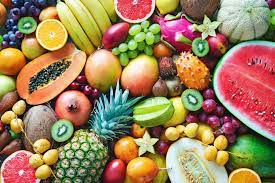
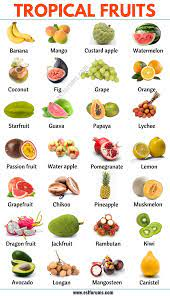
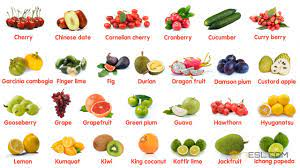
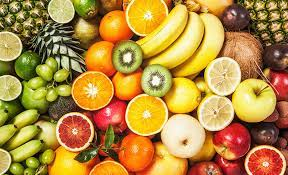
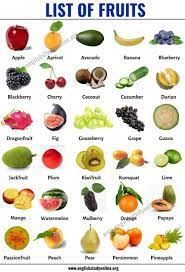
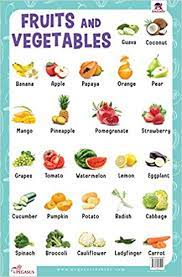
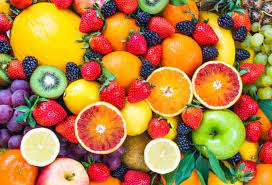
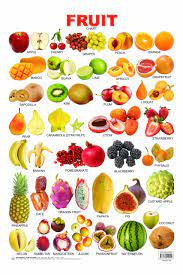
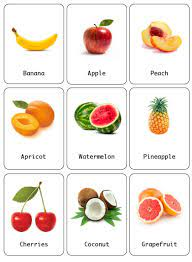
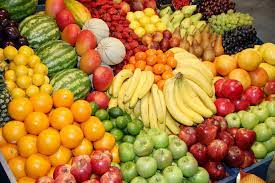
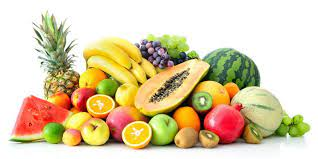
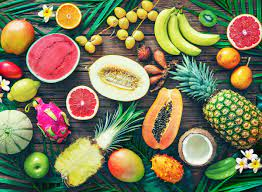
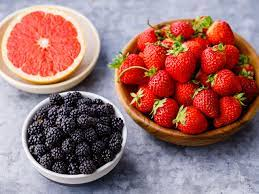
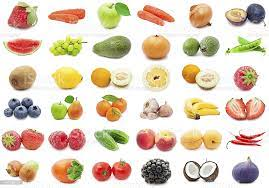
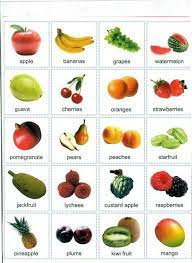
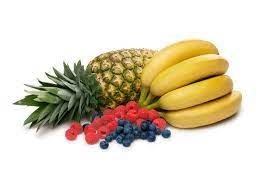
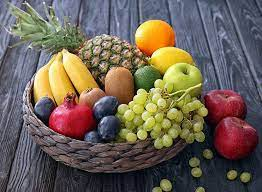
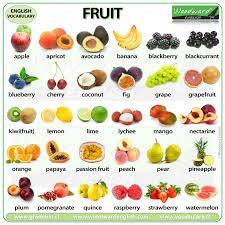
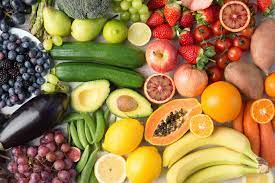
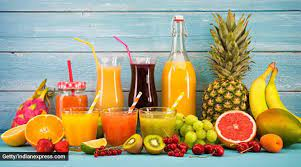

In [51]:
fruits_image=[]
try:
    image=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
    for i in image[:100]:
        fruits_image.append(i.get_attribute('src'))
except NoSuchElementException:
    fruits_image.append('-')
fruits_image

In [24]:
search=driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
search.send_keys('cars')


In [25]:
search_button=driver.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwJ-3rQj6ssAkw_CLSFd0slbAK5oy2whAakw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIeD6lpmutS_PTGYrNxYAsa2P7HZD-0uAA7g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxbjXwkwVr-14A0KU5__5zZb-b5nUEyJv2Rg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9tNWA9jrkFikCj-_MtuDBIesg2APINoXApg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3HcVG27eK--uy6usCydFQ3udgQUt8firi2A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_CzmXhj1J-lGs5kRvVGref4_lqg1qRQ4l7g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXGlTy0FUnhNi4cc9phU677dGdWb6y_lzx1Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu5mwXZ9iCFwuuXxVXai-VSUBnSrfA5FSqTg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsrYZ8FpwbKR
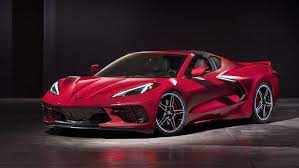
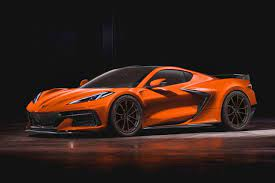
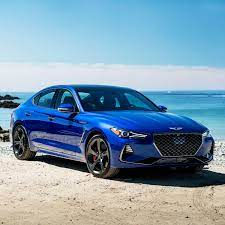
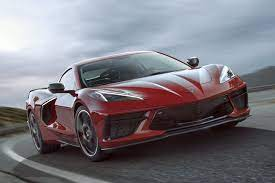
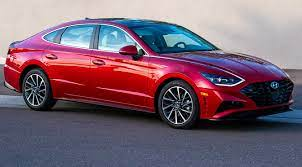
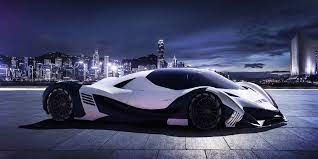
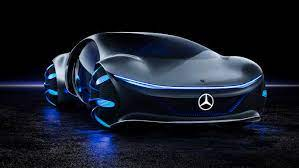
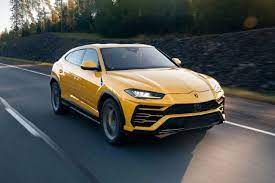
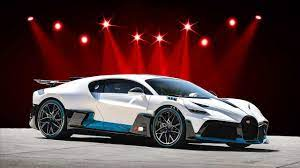
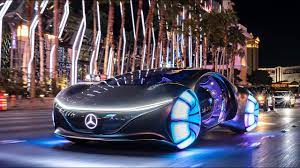
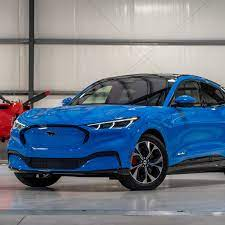
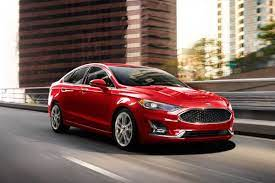
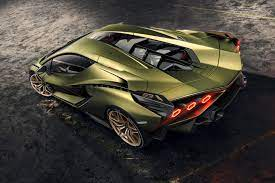
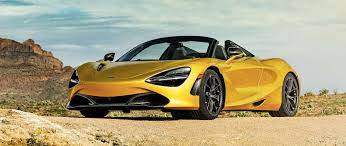
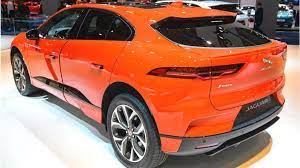
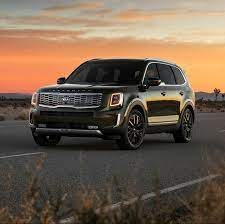
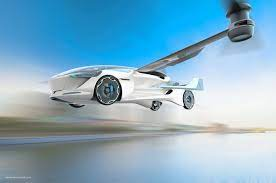
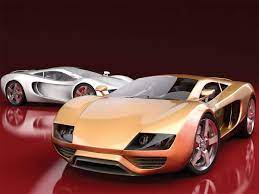
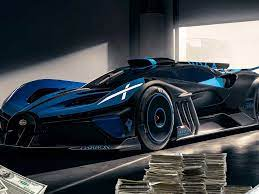
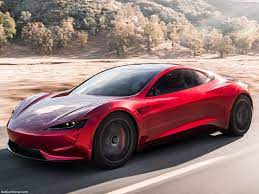

In [22]:
car_images=[]
try:
    images=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]/img')
    for i in images[:100]:
        car_images.append(i.get_attribute('src'))
except NoSuchElementException:
    car_images.append('-')
car_images

In [53]:
search=driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
search.send_keys('Machine Learning')


In [54]:
search_button=driver.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWwQAsLQGePm2peRX-jSUlmXt48OT8arllUQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQh4HzGIRo74WpbQfcr6SFZFkcsiykKzX5A-w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWShvZgyNR29CrJJKSA3MdMJtKDaS-B-_6dw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnnXZkPIuKunti63oDZ3qPDF-9YlYYuJaTmQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5LFpAD-FPmniqb8OCMo64l4q87A37IN6UMQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRkU62g7Rhz3aNupBoOc6pizY-19hH9-MJKA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOSwX0K0UGwBx3QEEuA4jYokxrs2iTEl9R6w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1VXGCyLKk_U8qzQ31abMiOSM3lg953_Qw3A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZc_PTpvBRL6
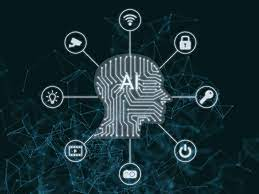
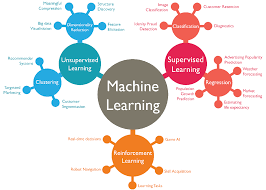
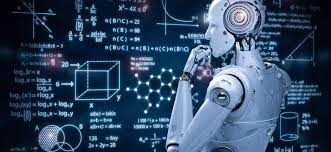
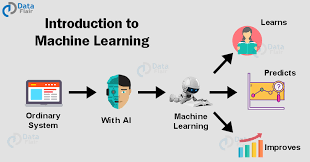
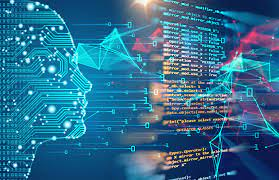
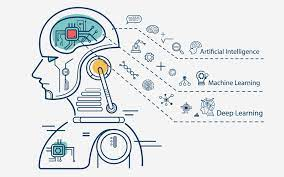
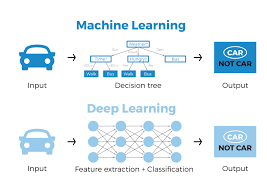
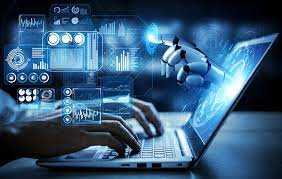
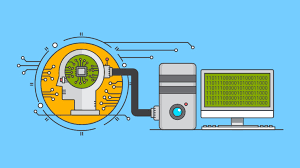
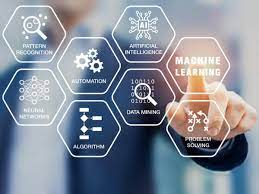
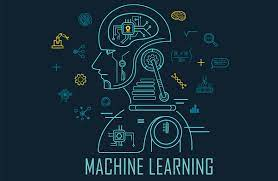
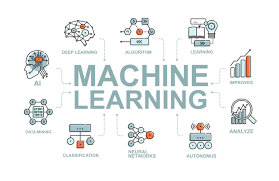
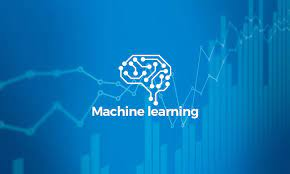
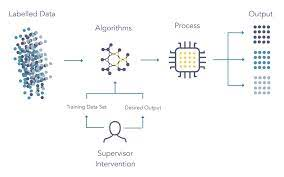
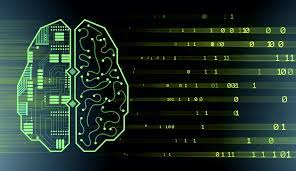
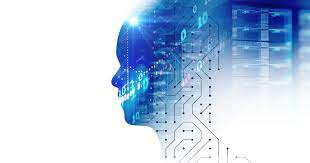
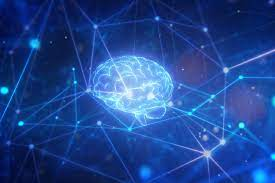
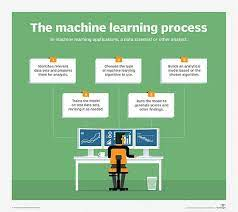
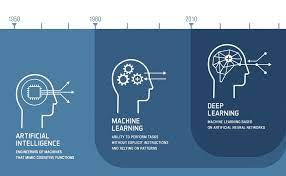
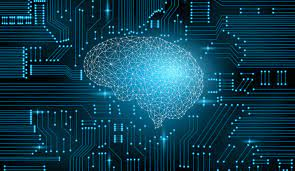

In [56]:
machine_learning_images=[]
try:
    machineimages=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
    for i in machineimages[:100]:
        machine_learning_images.append(i.get_attribute('src'))
except NoSuchElementException:
    machine_learning_images.append('-')
machine_learning_images


4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on 
www.flipkart.com and scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, 
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display 
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. 
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe 
and CSV.

In [15]:
#searching for flipkart 
url='https://www.flipkart.com/'
#getting url
driver.get(url)

In [16]:
search=driver.find_element_by_xpath('//input[@class="_3704LK"]')
search.send_keys('smartphone')


In [18]:
search_button=driver.find_element_by_xpath('//button[@class="L0Z3Pu"]')
search_button.click()

In [19]:
url=[]
product=driver.find_elements_by_xpath('//a[@class="_1fQZEK"]')
for i in product:
    url.append(i.get_attribute('href'))
url

['https://www.flipkart.com/realme-narzo-30-5g-racing-silver-128-gb/p/itm56837fcb0d6f3?pid=MOBG3W3GWVTBTQZQ&lid=LSTMOBG3W3GWVTBTQZQGONJ0G&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=c8a5d647-a9a7-4537-be7c-9b9e9488cfe6.MOBG3W3GWVTBTQZQ.SEARCH&ppt=hp&ppn=homepage&ssid=wgnk72xqc00000001626873127386&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/realme-c20-cool-blue-32-gb/p/itmea1903897436b?pid=MOBGF4894MEWZJGV&lid=LSTMOBGF4894MEWZJGVW425N5&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=c8a5d647-a9a7-4537-be7c-9b9e9488cfe6.MOBGF4894MEWZJGV.SEARCH&ppt=hp&ppn=homepage&ssid=wgnk72xqc00000001626873127386&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/realme-c20-cool-grey-32-gb/p/itmea1903897436b?pid=MOBGF489SQZCFHYA&lid=LSTMOBGF489SQZCFHYAGB7SDS&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=c8a5d647-a9a7-4

In [20]:
Brand=[]
try:
    brandname=driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
    for i in brandname:
        Brand.append(i.text)
except NoSuchElementException:
    Brand.append('-')
Brand

['realme Narzo 30 5G (Racing Silver, 128 GB)',
 'realme C20 (Cool Blue, 32 GB)',
 'realme C20 (Cool Grey, 32 GB)',
 'REDMI 9 Prime (Matte Black, 64 GB)',
 'realme Narzo 30 (Racing Silver, 64 GB)',
 'realme Narzo 30 5G (Racing Blue, 128 GB)',
 'realme Narzo 30 (Racing Blue, 64 GB)',
 'REDMI 9 Power (Mighty Black, 64 GB)',
 'realme C21 (Cross Black, 64 GB)',
 'realme C21 (Cross Blue, 64 GB)',
 'realme C21 (Cross Black, 32 GB)',
 'realme C21 (Cross Blue, 32 GB)',
 'POCO M3 (Cool Blue, 64 GB)',
 'REDMI 9i (Sea Blue, 64 GB)',
 'realme Narzo 30 (Racing Blue, 128 GB)',
 'POCO M3 (Power Black, 64 GB)',
 'REDMI 9i (Midnight Black, 64 GB)',
 'REDMI 9 Power (Blazing Blue, 64 GB)',
 'POCO M2 Reloaded (Mostly Blue, 64 GB)',
 'realme Narzo 30A (Laser Black, 32 GB)',
 'realme Narzo 30A (Laser Blue, 32 GB)',
 'POCO C3 (Matte Black, 64 GB)',
 'Infinix Hot 10 Play (Morandi Green, 64 GB)',
 'POCO C3 (Matte Black, 32 GB)']

In [41]:
Ram=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        ram=driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[1]')
        for i in ram:
            Ram.append(i.text)
    except NoSuchElementException:
        Ram.append('-')
Ram

['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '6 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '6 GB RAM | 128 GB ROM | Expandable Upto 256 GB',
 '6 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 

In [42]:
primary_camera=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        camera=driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[3]')
        for i in camera:
            primary_camera.append(i.text)
    except NoSuchElementException:
        primary_camera.append('-')
primary_camera

['48MP + 2MP + 2MP | 16MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '13MP + 8MP + 5MP + 2MP | 8MP Front Camera',
 '48MP + 2MP + 2MP | 16MP Front Camera',
 '48MP + 2MP + 2MP | 16MP Front Camera',
 '48MP + 2MP + 2MP | 16MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 8MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '48MP + 2MP + 2MP | 8MP Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '48MP + 2MP + 2MP | 16MP Front Camera',
 '48MP + 2MP + 2MP | 8MP Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 8MP Front Camera',
 '13MP + 8MP + 5MP + 2MP | 8MP Front Camera',
 '13MP + 2MP | 8MP Front Camera',
 '13MP + 2MP | 8MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + Depth Sensor | 8MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera']

In [43]:
display=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        mobiledisplay=driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[2]')
        for i in mobiledisplay:
            display.append(i.text)
    except NoSuchElementException:
        display.append('-')
display

['16.51 cm (6.5 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.54 cm (6.51 inch) HD+ Display',
 '16.54 cm (6.51 inch) HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '17.32 cm (6.82 inch) HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display']

In [44]:
processor=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        mobile=driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[5]')
        for i in mobile:
            processor.append(i.text)
    except NoSuchElementException:
        processor.append('-')
processor

['MediaTek Dimensity 700 (MT6833) Processor',
 'MediaTek Helio G35 Processor',
 'MediaTek Helio G35 Processor',
 'MediaTek Helio G80 Processor',
 'MediaTek Helio G95 Processor',
 'MediaTek Dimensity 700 (MT6833) Processor',
 'MediaTek Helio G95 Processor',
 'Qualcomm Snapdragon 662 Processor',
 'MediaTek Helio G35 Processor',
 'MediaTek Helio G35 Processor',
 'MediaTek Helio G35 Processor',
 'MediaTek Helio G35 Processor',
 'Qualcomm Snapdragon 662 Processor',
 'MediaTek Helio G25 Processor',
 'MediaTek Helio G95 Processor',
 'Qualcomm Snapdragon 662 Processor',
 'MediaTek Helio G25 Processor',
 'Qualcomm Snapdragon 662 Processor',
 'MediaTek Helio G80 Processor',
 'MediaTek Helio G85 Processor',
 'MediaTek Helio G85 Processor',
 'Mediatek Helio G35 Processor',
 'MediaTek Helio G35 Processor',
 'Mediatek Helio G35 Processor']

In [45]:
battery_capacity=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        capacity=driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]')
        for i in capacity:
            battery_capacity.append(i.text)
    except NoSuchElementException:
        battery_capacity.append('-')
battery_capacity

['5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5020 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Lithium-ion Polymer Battery',
 '5000 mAh Lithium Polymer Battery',
 '5000 mAh Battery',
 '6000 mAh Lithium-ion Polymer Battery',
 '5000 mAh Lithium Polymer Battery',
 '6000 mAh Battery',
 '5000 mAh Lithium Polymer Battery',
 '6000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Li-ion Polymer Battery',
 '6000 mAh Li-ion Polymer Battery',
 '5000 mAh Li-ion Polymer Battery']

In [46]:
price=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        cost=driver.find_elements_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        for i in cost:
            price.append(i.text)
    except NoSuchElementException:
        price.append('-')
price

['₹15,999',
 '₹6,999',
 '₹6,999',
 '₹9,999',
 '₹12,499',
 '₹15,999',
 '₹12,499',
 '₹10,999',
 '₹9,499',
 '₹9,499',
 '₹8,499',
 '₹8,499',
 '₹11,499',
 '₹8,299',
 '₹14,499',
 '₹11,499',
 '₹8,299',
 '₹10,999',
 '₹9,999',
 '₹8,999',
 '₹8,999',
 '₹8,499',
 '₹8,999',
 '₹7,499']

In [48]:
len(price),len(battery_capacity),len(processor),len(display),len(primary_camera),len(Ram),len(Brand),len(url)

(24, 24, 24, 24, 24, 24, 24, 24)

In [52]:
import pandas as pd
mobile_products=pd.DataFrame({'Product_urls':url,'Brand':Brand,'Ram':Ram,'Primary_camera':primary_camera,'Display':display,'Processor':processor,'Battery_capacity':battery_capacity,'Price':price})
mobile_products

,Product_urls,Brand,Ram,Primary_camera,Display,Processor,Battery_capacity,Price
0,https://www.flipkart.com/realme-narzo-30-5g-ra...,"realme Narzo 30 5G (Racing Silver, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,MediaTek Dimensity 700 (MT6833) Processor,5000 mAh Battery,"₹15,999"
1,https://www.flipkart.com/realme-c20-cool-blue-...,"realme C20 (Cool Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹6,999"
2,https://www.flipkart.com/realme-c20-cool-grey-...,"realme C20 (Cool Grey, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹6,999"
3,https://www.flipkart.com/redmi-9-prime-matte-b...,"REDMI 9 Prime (Matte Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,MediaTek Helio G80 Processor,5020 mAh Battery,"₹9,999"
4,https://www.flipkart.com/realme-narzo-30-racin...,"realme Narzo 30 (Racing Silver, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,48MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,MediaTek Helio G95 Processor,5000 mAh Battery,"₹12,499"
5,https://www.flipkart.com/realme-narzo-30-5g-ra...,"realme Narzo 30 5G (Racing Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,MediaTek Dimensity 700 (MT6833) Processor,5000 mAh Battery,"₹15,999"
6,https://www.flipkart.com/realme-narzo-30-racin...,"realme Narzo 30 (Racing Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,48MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,MediaTek Helio G95 Processor,5000 mAh Battery,"₹12,499"
7,https://www.flipkart.com/redmi-9-power-mighty-...,"REDMI 9 Power (Mighty Black, 64 GB)",4 GB RAM | 64 GB ROM,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,Qualcomm Snapdragon 662 Processor,6000 mAh Battery,"₹10,999"
8,https://www.flipkart.com/realme-c21-cross-blac...,"realme C21 (Cross Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,13MP + 2MP + 2MP | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹9,499"
9,https://www.flipkart.com/realme-c21-cross-blue...,"realme C21 (Cross Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,13MP + 2MP + 2MP | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹9,499"


In [55]:
data=mobile_products.to_csv
data

<bound method NDFrame.to_csv of                                          Product_urls  \
0   https://www.flipkart.com/realme-narzo-30-5g-ra...   
1   https://www.flipkart.com/realme-c20-cool-blue-...   
2   https://www.flipkart.com/realme-c20-cool-grey-...   
3   https://www.flipkart.com/redmi-9-prime-matte-b...   
4   https://www.flipkart.com/realme-narzo-30-racin...   
5   https://www.flipkart.com/realme-narzo-30-5g-ra...   
6   https://www.flipkart.com/realme-narzo-30-racin...   
7   https://www.flipkart.com/redmi-9-power-mighty-...   
8   https://www.flipkart.com/realme-c21-cross-blac...   
9   https://www.flipkart.com/realme-c21-cross-blue...   
10  https://www.flipkart.com/realme-c21-cross-blac...   
11  https://www.flipkart.com/realme-c21-cross-blue...   
12  https://www.flipkart.com/poco-m3-cool-blue-64-...   
13  https://www.flipkart.com/redmi-9i-sea-blue-64-...   
14  https://www.flipkart.com/realme-narzo-30-racin...   
15  https://www.flipkart.com/poco-m3-power-black-6...   

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on 
google maps

In [18]:
#importing beautiful soup
from bs4 import BeautifulSoup
#Importing requests
import requests
# importing regex
import re

In [22]:
# opening google maps
url = "https://www.google.co.in/maps"
driver.get(url)
time.sleep(2)

In [23]:
# locating search bar
search = driver.find_element_by_id("searchboxinput")                      
# clearing search bar
search.clear()                                                             
time.sleep(2)

In [24]:
## entering values in search bar
search.send_keys("Bangalore")
# locating search button
button = driver.find_element_by_id("searchbox-searchbutton")               
button.click()                                                             
time.sleep(3)

try:
    url_string = driver.current_url   #Extracting  URL 
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

Latitude = 12.9538477, Longitude = 77.3507405


6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in.

In [93]:
#searching for trak.in website
url='https://trak.in/india-startup-funding-investment-2015/'
#getting url
driver.get(url)

In [85]:
funding=[]
funding_details=driver.find_elements_by_xpath('//*[@id="content"]/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/h2[11]')
for i in funding_details:
    funding.append(i.text)
funding

['July, 2020']

In [86]:
entries=driver.find_element_by_xpath('//*[@id="tablepress-48_length"]/label/select')
entries.send_keys('10')
entries.click()

In [87]:
table=[]
try:
    text=driver.find_elements_by_xpath('//*[@id="tablepress-48_wrapper"]')
    for i in text:
        table.append(i.text)
except NoSuchElementException:
    table.append(i.text)
table

["Show\n10\n25\n50\n100\nentries\nSearch:\nSr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 15/07/2020 Flipkart E-commerce E-commerce Bangalore Walmart Inc\nM&A 1,200,000,000\n2 16/07/2020 Vedantu EduTech Online Tutoring Bangalore Coatue Management Series D 100,000,000\n3 16/07/2020 Crio EduTech Learning Platform for Developers Bangalore 021 Capital pre-Series A 934,160\n4 14/07/2020 goDutch FinTech Group Payments Mumbai Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq. Seed 1,700,000\n5 13/07/2020 Mystifly\nAirfare Marketplace Ticketing, Airline Retailing, and Post-Ticketing Services Singapore and Bangalore Recruit Co. Ltd.\n\npre-Series B 3,300,000\n6 09/07/2020 JetSynthesys Gaming and Entertainment Gaming and Entertainment\n\nPune Adar Poonawalla and Kris Gopalakrishnan.\nVenture-Series Unknown 400,000\n7 10/07/2020 gigIndia\nMarketplace Crowd Sourcing, Freelanc

In [90]:
funding=[]
funding_details=driver.find_elements_by_xpath('//*[@id="content"]/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/h2[10]')
for i in funding_details:
    funding.append(i.text)
funding

['August, 2020']

In [91]:
entries=driver.find_element_by_xpath('//*[@id="tablepress-49_length"]/label/select')
entries.send_keys('10')
entries.click()

In [92]:
table=[]
try:
    text=driver.find_elements_by_xpath('//*[@id="tablepress-49_wrapper"]')
    for i in text:
        table.append(i.text)
except NoSuchElementException:
    table.append(i.text)
table

["Show\n10\n25\n50\n100\nentries\nSearch:\nSr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 15/08/2020 Practo HealthTech Health care and Wellness Bangalore A1A Company\nSeries F 32,000,000\n2 13/08/2020 Medlife E-commerce Online Pharmacy Bangalore Prasid Uno Family Trust and SC Credit Fund 23,000,000\n3 13/08/2020 HungerBox\nFoodTech Online Food Delivery Service Bangalore One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar Series D1 1,560,000\n4 04/08/2020 Dunzo Hyper-local Logistics Online Delivery Services Bangalore Existing Backers In Progress 30,000,000\n5 11/08/2020 Terra.do EduTech Online Climate School, E-learning Stanford, California, Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital\n\nSeed 1,400,000\n6 12/08/2020 Classplus EduTech E-learning, Online Tutoring\n\nNoida Falcon Edge In Progress upto 15,000,000\n7 14/08/2020 Niyo FinTec

In [94]:
funding=[]
funding_details=driver.find_elements_by_xpath('//*[@id="content"]/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/h2[9]')
for i in funding_details:
    funding.append(i.text)
funding

['September, 2020']

In [95]:
entries=driver.find_element_by_xpath('//*[@id="tablepress-50_length"]/label/select')
entries.send_keys('10')
entries.click()

In [96]:
table=[]
try:
    text=driver.find_elements_by_xpath('//*[@id="tablepress-50_wrapper"]')
    for i in text:
        table.append(i.text)
except NoSuchElementException:
    table.append(i.text)
table

["Show\n10\n25\n50\n100\nentries\nSearch:\nSr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 08/09/2020 Byju’s EduTech Online Tutoring Bangalore Silver Lake, Tiger Global, General Atlantic and Owl Ventures\nPrivate Equity 500,000,000\n2 12/09/2020 mCaffeine Personal Care Skincare & Haircare Mumbai Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1 Series B 3,000,000\n3 09/09/2020 Qshala EduTech Online Curiosity Platform for Kids Bangalore Rainmatter Capital Angel 370,000\n4 02/09/2020 Winzo Online Gaming Online Gaming New Delhi Kalaari Capital Partners, IndigoEdge Management Consultancy Series B 15,500,000\n5 09/09/2020 Hippo Video Video Customer Experience(CX) Platform Video Customer Experience(CX) Platform Newark, Delaware, United States of Amercia Alpha Wave Incubation, Exfinity Venture Partners and existing backers.\nSeries A 4,500,000\n6 07/09/20

7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [98]:
#searching for digit.in
url='https://www.digit.in/#'
#getting url
driver.get(url)

In [102]:
search=driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[3]/div[2]/a/img')
search.click()

In [104]:
top_search=driver.find_element_by_xpath('//div[@class="top-serch"]/input')
top_search.send_keys('best gaming laptops')

In [115]:
product_name=[]
product=driver.find_elements_by_xpath('//div[@class="searchProduct-desc"]')
for i in product:
    product_name.append(i.text)
product_name

['Asus G750JX-CV069P',
 'Lenovo G50-30',
 "ASUS G53J - A 3D gamer's delight but we want more",
 'Dell Vostro 15 3500',
 'Samsung Series 9 (NP-900X3C)',
 'HP Envy 15-k006tx',
 'HP Envy dv6-7206tx notebook',
 'Asus GTX980 Matrix Platinum',
 'ASUS ROG Flow x13',
 'Lenovo IdeaPad Y570']

In [114]:
product_urls=[]
urls=driver.find_elements_by_xpath('//div[@class="searchPage"]/a')
for i in urls:
    product_urls.append(i.get_attribute('href'))
product_urls

['https://www.digit.in/laptops/asus-g750jx-cv069p-price-4426.html',
 'https://www.digit.in/laptops/lenovo-g50-30-price-6793.html',
 'https://www.digit.in/laptops/asus-g53j-a-3d-gamer-s-delight-but-we-want-more-price-3465.html',
 'https://www.digit.in/laptops/dell-vostro-15-3500-price-221765.html',
 'https://www.digit.in/laptops/samsung-series-9-np-900x3c-price-2663.html',
 'https://www.digit.in/laptops/hp-envy-15-k006tx-price-4429.html',
 'https://www.digit.in/laptops/hp-envy-dv6-7206tx-notebook-price-3097.html',
 'https://www.digit.in/pc-components/asus-gtx980-matrix-platinum-price-4859.html',
 'https://www.digit.in/laptops/asus-rog-flow-x13-price-229735.html',
 'https://www.digit.in/laptops/lenovo-ideapad-y570-price-2979.html']

In [124]:
price=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    cost=driver.find_elements_by_xpath('//div[@class="Block-price"]/b')
    for i in cost:
        price.append(i.text)
price

['149,999',
 '25,694',
 '112,499',
 '38,489',
 '80,510',
 '65,705',
 '52,000',
 '154,990',
 '49,900']

In [129]:
market_status=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        status=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[4]/a/div/b')
        for i in status:
            market_status.append(i.text)
    except NoSuchElementException:
         market_status.append('-')
            
market_status

['LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'DISCONTINUED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED',
 'LAUNCHED']

In [127]:
release_date=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        date=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[1]/div[2]/b')
        for i in date:
            release_date.append(i.text)
    except NoSuchElementException:
         release_date.append('-')
            
release_date

['14 Oct, 2014',
 '17 Mar, 2016',
 '13 Jan, 2011',
 '17 Mar, 2021',
 '01 Nov, 2012',
 '14 Oct, 2014',
 '23 Feb, 2013',
 '30 Jan, 2015',
 '05 May, 2021',
 '07 Feb, 2012']

In [128]:
brand=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        product=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[1]/div[3]/b')
        for i in product:
            brand.append(i.text)
    except NoSuchElementException:
         brand.append('-')
brand

['Asus',
 'Lenovo',
 'Asus',
 'Dell',
 'Samsung',
 'HP',
 'HP',
 'Asus',
 'Asus',
 'Lenovo']

In [140]:
digit_rating=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        digit=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[2]/ul/li/p')
        for i in digit:
            digit_rating.append(i.text)
    except NoSuchElementException:
         digit_rating.append('-')
digit_rating

['70', '90', '90', '72', '68', '90']

In [132]:
specifications=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        specifiy=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[3]/div/ul/li[1]/div')
        for i in specifiy:
            specifications.append(i.text.replace('NA','-'))
    except NoSuchElementException:
         specifications.append('-')
specifications

['-',
 '-',
 '-',
 'Windows 10 Home',
 '-',
 '-',
 'Windows 8 64 Bit',
 'Windows 10 Pro',
 'Windows 7 (64-Bit)']

In [133]:
display=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        productdisplay=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[3]/div/ul/li[2]/div')
        for i in productdisplay:
            display.append(i.text.replace('NA','-'))
    except NoSuchElementException:
         display.append('-')
display

['-',
 '-',
 '-',
 '15.6" (1920 X 1080)',
 '-',
 '-',
 '15.6" (1366 X 768)',
 '13.4" (3840 X 2400)',
 '15.6" (1366 X 768)']

In [136]:
processor=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        product=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[3]/div/ul/li[3]/div')
        for i in product:
            processor.append(i.text.replace('NA','-'))
    except NoSuchElementException:
         processor.append('-')
processor

['-',
 '-',
 '-',
 '11th Generation Intel® Core™ I3-1115G4 | -',
 '-',
 '-',
 'Intel Core I7 (3rd Generation) | 2.4 Ghz',
 'AMD Ryzen™ 9 5980HS Processor 3.1 GHz | -',
 'Intel Core I7 (2nd Generation) | 2 Ghz']

In [137]:
memory=[]
for i in product_urls:
    driver.get(i)
    time.sleep(2)
    try:
        productmemory=driver.find_elements_by_xpath('/html/body/div[7]/div/div/div[6]/div[1]/div[2]/div[3]/div/ul/li[4]/div')
        for i in productmemory:
            memory.append(i.text.replace('NA','-'))
    except NoSuchElementException:
         memory.append('-')
memory

['1 TB SATA/8 GBGB DDR4',
 '1 TB SATA/8GB DDR3',
 '16GB*2 LPDDR4X/4 GBGB GDDR6',
 '750 GB -/6GB DDR3']

8. Write a python program to scrape the details for all billionaires from www.forbes.com. 
Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, 
“Industry”

In [273]:
#searching for billionaries
url='https://www.forbes.com/real-time-billionaires/#51984ba73d78'
#getting url
driver.get(url)

In [274]:
urls=[]
try:
    url=driver.find_elements_by_xpath('//a[@class="ng-scope"]')
    for i in url:
        urls.append(i.get_attribute('href'))
except NoSuchElementException:
    urls.append('-')
urls

['https://www.forbes.com/profile/jeff-bezos/?list=rtb/',
 'https://www.forbes.com/profile/bernard-arnault/?list=rtb/',
 'https://www.forbes.com/profile/elon-musk/?list=rtb/',
 'https://www.forbes.com/profile/bill-gates/?list=rtb/',
 'https://www.forbes.com/profile/mark-zuckerberg/?list=rtb/',
 'https://www.forbes.com/profile/larry-ellison/?list=rtb/',
 'https://www.forbes.com/profile/larry-page/?list=rtb/',
 'https://www.forbes.com/profile/sergey-brin/?list=rtb/',
 'https://www.forbes.com/profile/warren-buffett/?list=rtb/',
 'https://www.forbes.com/profile/francoise-bettencourt-meyers/?list=rtb/',
 'https://www.forbes.com/profile/steve-ballmer/?list=rtb/',
 'https://www.forbes.com/profile/mukesh-ambani/?list=rtb/',
 'https://www.forbes.com/profile/amancio-ortega/?list=rtb/',
 'https://www.forbes.com/profile/zhong-shanshan/?list=rtb/',
 'https://www.forbes.com/profile/carlos-slim-helu/?list=rtb/',
 'https://www.forbes.com/profile/jim-walton/?list=rtb/',
 'https://www.forbes.com/profile/

In [276]:
Rank=[]
for i in urls:
    driver.get(i)
    try:
        rank=driver.find_elements_by_xpath('//span[@class="profile-heading__rank"]')
        for i in rank:
            Rank.append(i.text)
    except NoSuchElementException:
        Rank.append('-')
Rank        

['#1',
 '#2',
 '#3',
 '#4',
 '#5',
 '#6',
 '#7',
 '#8',
 '#9',
 '#10',
 '#11',
 '#12',
 '#13',
 '#14',
 '#15',
 '#16',
 '#17',
 '#18',
 '#19',
 '#20',
 '#21',
 '#22',
 '#23',
 '#24',
 '#25']

In [278]:
name=[]
for i in urls:
    driver.get(i)
    try:
        billionaire=driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[1]/div[3]/h1')
        for i in billionaire:
            name.append(i.text)
    except NoSuchElementException:
        name.append('-')
name        

['#1 Jeff Bezos',
 '#2 Bernard Arnault & family',
 '#3 Elon Musk',
 '#4 Bill Gates',
 '#5 Mark Zuckerberg',
 '#6 Larry Ellison',
 '#7 Larry Page',
 '#8 Sergey Brin',
 '#9 Warren Buffett',
 '#10 Francoise Bettencourt Meyers & family',
 '#11 Steve Ballmer',
 '#12 Mukesh Ambani',
 '#13 Amancio Ortega',
 '#14 Zhong Shanshan',
 '#15 Carlos Slim Helu & family',
 '#16 Jim Walton',
 '#17 Alice Walton',
 '#18 Rob Walton',
 '#19 MacKenzie Scott',
 '#20 Michael Bloomberg',
 '#21 Phil Knight & family',
 '#22 François Pinault & family',
 '#23 Ma Huateng',
 '#24 Gautam Adani & family',
 '#25 Michael Dell']

In [279]:
net_worth=[]
for i in urls:
    driver.get(i)
    try:
        worth=driver.find_elements_by_xpath('//div[@class="profile-info__item-value"]')
        for i in worth:
            net_worth.append(i.text)
    except NoSuchElementException:
        net_worth.append('-')
net_worth       

['$203.7B',
 '$184B',
 '$160.7B',
 '$128.1B',
 '$121.4B',
 '$111.8B',
 '$108.8B',
 '$105.4B',
 '$99B',
 '$88.4B',
 '$81.4B',
 '$79.5B',
 '$76.3B',
 '$75.7B',
 '$70.3B',
 '$64.6B',
 '$64.2B',
 '$63.8B',
 '$59.7B',
 '$59B',
 '$57.5B',
 '$54B',
 '$53.3B',
 '$52.7B',
 '$48B']

In [282]:
Age=[]
for i in urls:
    driver.get(i)
    try:
        age=driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[1]/div[8]/div[2]/span[2]')
        for i in age:
            Age.append(i.text)
    except NoSuchElementException:
        Age.append('-')
Age      

['57',
 '72',
 '50',
 '65',
 '37',
 '76',
 '48',
 '47',
 '90',
 '68',
 '65',
 '64',
 '85',
 '66',
 '81',
 '73',
 '71',
 '76',
 '51',
 '79',
 '83',
 '84',
 '49',
 '59',
 '56']

In [288]:
citizenship=[]
for i in urls:
    driver.get(i)
    try:
        citizen=driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[1]/div[8]/div[5]/span[2]')
        for i in citizen:
            citizenship.append(i.text)
    except NoSuchElementException:
        citizenship.append('-')
citizenship     

['Seattle, Washington',
 'France',
 'Austin, Texas',
 'Medina, Washington',
 'Palo Alto, California',
 'Lanai, Hawaii',
 'Palo Alto, California',
 'Los Altos, California',
 'Omaha, Nebraska',
 'France',
 'Hunts Point, Washington',
 'India',
 'Spain',
 'China',
 'Mexico',
 'Bentonville, Arkansas',
 'Fort Worth, Texas',
 'Bentonville, Arkansas',
 'Seattle, Washington',
 'New York, New York',
 'Hillsboro, Oregon',
 'France',
 'China',
 'India',
 'Austin, Texas']

In [289]:
source=[]
for i in urls:
    driver.get(i)
    try:
        area=driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[1]/div[8]/div[3]/span[2]')
        for i in area:
            source.append(i.text)
    except NoSuchElementException:
        source.append('-')
source     

['Amazon, Self Made',
 'LVMH',
 'Tesla, SpaceX, Self Made',
 'Microsoft, Self Made',
 'Facebook, Self Made',
 'software, Self Made',
 'Google, Self Made',
 'Google, Self Made',
 'Berkshire Hathaway, Self Made',
 "L'Oréal",
 'Microsoft, Self Made',
 'diversified',
 'Zara, Self Made',
 'beverages, pharmaceuticals, Self Made',
 'telecom, Self Made',
 'Walmart',
 'Walmart',
 'Walmart',
 'Amazon',
 'Bloomberg LP, Self Made',
 'Nike, Self Made',
 'luxury goods, Self Made',
 'internet media, Self Made',
 'infrastructure, commodities, Self Made',
 'Dell computers, Self Made']

In [286]:
industry=[]
for i in urls:
    driver.get(i)
    try:
        field=driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[2]/div[2]/fbs-carousel/div[1]/div/div[2]/div/div[2]/a/div')
        for i in field:
            industry.append(i.text)
    except NoSuchElementException:
        industry.append('-')
industry

['Amazon',
 'Hermès International',
 'Tesla',
 'Microsoft',
 'Facebook',
 'Oracle',
 'Alphabet',
 'Alphabet',
 'Berkshire Hathaway',
 'France',
 'Microsoft',
 'Reliance Industries',
 'Inditex',
 'Grupo Carso',
 'Walmart',
 'Walmart',
 'Walmart',
 'Amazon',
 'Charles Zegar',
 'Nike',
 'Kering',
 'Tencent Holdings',
 'Adani Ports & Special Economic Zone',
 'Dell Technologies']

9. Write a program to extract at least 500 Comments, Comment upvote and time when comment 
was posted from any YouTube Video

In [97]:
#searching for youtube
url='https://www.youtube.com/'
#getting url
driver.get(url)

In [98]:
title=driver.find_element_by_xpath('//*[@id="search"]')
title.send_keys('web scraping')

In [99]:
search=driver.find_element_by_xpath('//*[@id="search-icon-legacy"]/yt-icon')
search.click()

In [100]:
#searching for youtube
url='https://www.youtube.com/watch?v=xfzGZB4HhEE&list=RDCMUC8butISFwT-Wl7EV0hUK0BQ&index=5'
#getting url
driver.get(url)

In [101]:
commenturl=driver.find_element_by_xpath('//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
commenturl

<selenium.webdriver.remote.webelement.WebElement (session="faa0de629ce75b408088efe5e9ffe133", element="39fa20ec-37bf-4388-8a7d-4d28fd5a689a")>

In [91]:
publiccomments=[]
comments=driver.find_elements_by_xpath('//*[@id="content-text"]')
for i in comments[:500]:
    publiccomments.append(i.text)
publiccomments
    

["Sir, you clearly explained both financial and coding keywords better than my professors did in 4 years of schooling. You're a great teacher!!",
 'you can also use alpha_vantage to get "free" stock data',
 'freakin hell! how good is this! Lockdown boredom solved. Thanks!',
 "Note that there are a few pops in Nick's sound at the beginning, but these go away completely once he starts building projects at the 17:20 mark.",
 'I like how the errors were made without editing them out from the clip. Thanks for including all those in.',
 'I can appreciate very much the way the whole process is explained, however looping through Pandas DataFrame for simple math calculations is not "the Pandas way" of doing things :)',
 "It's never too late to start investing. The best time to invest in stocks was always yesterday and the second best is always today.",
 'Thank you for this video but I think everybody is feeling the absence of the second section. Any updates would be greatly appreciated.',
 'Awe

In [92]:
len(publiccomments)

500

In [94]:
time=[]
commenttime=driver.find_elements_by_xpath('//*[@id="header-author"]/yt-formatted-string/a')
for i in commenttime[:500]:
    time.append(i.text)
time

['7 months ago',
 '3 days ago',
 '6 months ago',
 '7 months ago',
 '7 months ago (edited)',
 '1 week ago',
 '4 months ago',
 '6 months ago',
 '6 months ago',
 '3 months ago',
 '7 months ago',
 '5 months ago',
 '3 months ago',
 '4 months ago',
 '5 months ago',
 '7 months ago',
 '7 months ago',
 '6 months ago',
 '6 months ago',
 '7 months ago',
 '4 months ago',
 '5 months ago',
 '5 months ago',
 '7 months ago',
 '5 months ago',
 '7 months ago',
 '1 month ago',
 '2 days ago',
 '7 months ago (edited)',
 '5 months ago',
 '7 months ago',
 '7 months ago',
 '1 month ago',
 '5 months ago',
 '7 months ago',
 '7 months ago',
 '5 months ago',
 '5 months ago (edited)',
 '5 months ago',
 '7 months ago',
 '7 months ago',
 '7 months ago',
 '7 months ago',
 '3 months ago',
 '1 month ago',
 '7 months ago',
 '1 month ago',
 '1 month ago',
 '3 weeks ago',
 '4 months ago',
 '6 months ago',
 '7 months ago',
 '4 months ago',
 '6 months ago (edited)',
 '4 days ago',
 '4 months ago',
 '7 months ago',
 '5 month

In [95]:
len(time)

500

In [105]:
vote=[]
try:
    upvote=driver.find_elements_by_xpath('//*[@id="vote-count-middle"]')
    for i in upvote[:500]:
        vote.append(i.text)
except NoSuchElementException:
    vote.append('-')
vote

['94',
 '5',
 '197',
 '55',
 '31',
 '37',
 '11',
 '166',
 '444',
 '1',
 '11',
 '8',
 '28',
 '11',
 '51',
 '40',
 '',
 '28',
 '1',
 '32',
 '39',
 '',
 '1',
 '',
 '1',
 '8',
 '27',
 '11',
 '41',
 '2',
 '30',
 '1',
 '1',
 '1',
 '2',
 '3',
 '',
 '1',
 '',
 '',
 '3',
 '',
 '',
 '',
 '',
 '10',
 '',
 '',
 '',
 '',
 '5',
 '1',
 '1',
 '',
 '',
 '4',
 '',
 '1',
 '',
 '1',
 '30',
 '1',
 '',
 '1',
 '',
 '3',
 '',
 '',
 '',
 '',
 '13',
 '',
 '',
 '',
 '',
 '4',
 '',
 '',
 '',
 '',
 '15',
 '',
 '',
 '1',
 '',
 '4',
 '1',
 '',
 '',
 '',
 '3',
 '',
 '',
 '',
 '1',
 '6',
 '',
 '',
 '',
 '',
 '4',
 '',
 '',
 '1',
 '',
 '8',
 '',
 '',
 '1',
 '',
 '10',
 '',
 '2',
 '',
 '',
 '4',
 '',
 '',
 '',
 '',
 '3',
 '',
 '',
 '',
 '',
 '4',
 '',
 '',
 '',
 '',
 '14',
 '1',
 '',
 '',
 '',
 '477',
 '',
 '',
 '',
 '1',
 '10',
 '',
 '1',
 '',
 '',
 '6',
 '',
 '',
 '',
 '',
 '31',
 '',
 '',
 '',
 '',
 '4',
 '',
 '',
 '',
 '',
 '9',
 '1',
 '',
 '',
 '2',
 '3',
 '',
 '',
 '',
 '',
 '6',
 '',
 '',
 '',
 '',
 '6',
 '',
 '1

In [106]:
len(vote)

500

10. Write a python program to scrape a data for all available Hostels from 
https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, 
distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms 
from price, facilities and property description.

In [216]:
#searching for hostles in london
url='https://www.hostelworld.com/ '
#getting url
driver.get(url)

In [217]:
title=driver.find_element_by_xpath('//*[@id="location-text-input-field"]')
title.click()

In [218]:
search=driver.find_element_by_xpath('//*[@id="location-text-input-field"]')
search.send_keys('London')

In [219]:
calendar=driver.find_element_by_xpath('//i[@class="core-icon icon-core-calendar"]')
calendar.click()

In [220]:
check_out=driver.find_element_by_xpath('//div[@class="field-inner"]/span')
check_out.click()

In [221]:
guests=driver.find_element_by_xpath('//span[@class="icon"]')
guests.click()

In [222]:
title=driver.find_element_by_xpath('//input[@class="location-text"]')
title.click()

In [224]:
search=driver.find_element_by_xpath('//*[@id="location-text-input-field"]')
search.send_keys('London')

In [207]:
search=driver.find_element_by_xpath('//*[@id="search-button"]')
search.click()

In [209]:
hostel_name=[]
try:
    name=driver.find_elements_by_xpath('//h2[@class="title title-6"]/a')
    for i in name:
        hostel_name.append(i.text)
except NoSuchElementException:
    hostel_name.append('-')
hostel_name

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 '247london Hostel and Private Rooms',
 'PubLove @ The Steam Engine, Waterloo',
 'The London Home Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Astor Museum Inn',
 'Well Street Hall',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'YHA London St Pancras',
 'SoHostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'Jaeger Acton Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel',
 'Hootananny Hostel',
 'Phoenix Hostel']

In [153]:
distance=[]
kms=driver.find_elements_by_xpath('//span[@class="description"]')
for i in kms:
    distance.append(i.text)
distance

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Bed and Breakfast - 6.7km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 3.3km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 6.1km from city centre',
 'Hostel - 8.2km from

In [154]:
reviews=[]
review=driver.find_elements_by_xpath('//div[@class="keyword"]')
for i in review:
    reviews.append(i.text)
reviews

['Superb',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Superb',
 'Good',
 'No Rating',
 'Fabulous',
 'Very Good',
 'Superb',
 'Fabulous',
 'Good',
 'Superb',
 'NEW',
 'Fabulous',
 'Superb',
 'Rating',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Rating',
 'Fabulous',
 'Fabulous']

In [155]:
rating=[]
hostlerating=driver.find_elements_by_xpath('//div[@class="score orange big"]')
for i in hostlerating:
    rating.append(i.text)
rating

['8.8',
 '7.5',
 '9.8',
 '6.8',
 '8.9',
 '7.7',
 '9.3',
 '8.1',
 '6.9',
 '9.6',
 '8.9',
 '10',
 '8.8',
 '9.5',
 '9.0',
 '9.7',
 '9.6',
 '9.7',
 '9.4',
 '9.1',
 '7.3',
 '8.6',
 '8.9',
 '7.2',
 '8.0',
 '8.5']

In [156]:
total_reviews=[]
reviews=driver.find_elements_by_xpath('//div[@class="reviews"]')
for i in reviews:
    total_reviews.append(i.text)  
total_reviews

['10819 Total Reviews',
 '6732 Total Reviews',
 '1074 Total Reviews',
 '207 Total Reviews',
 '443 Total Reviews',
 '186 Total Reviews',
 '248 Total Reviews',
 '13128 Total Reviews',
 '3942 Total Reviews',
 '391 Total Reviews',
 '8707 Total Reviews',
 '0 Total Reviews',
 '130 Total Reviews',
 '513 Total Reviews',
 '194 Total Reviews',
 '4562 Total Reviews',
 '2775 Total Reviews',
 '3951 Total Reviews',
 '8109 Total Reviews',
 '3166 Total Reviews',
 '26 Total Reviews',
 '879 Total Reviews',
 '11321 Total Reviews',
 '3654 Total Reviews',
 '593 Total Reviews',
 '6324 Total Reviews',
 '998 Total Reviews',
 '357 Total Reviews',
 '1406 Total Reviews',
 '3403 Total Reviews']

In [244]:
price=[]
try:
    privates=driver.find_elements_by_xpath('//div[@class="price title-5"]')
    for i in privates:
        price.append(i.text)
except NoSuchElementException:
    price.append('-')
price

['Rs4587',
 'Rs1479',
 'Rs8318',
 'Rs1985',
 'Rs1109',
 'Rs6161',
 'Rs1540',
 'Rs5237',
 'Rs1540',
 'Rs4107',
 'Rs1622',
 'Rs9392',
 'Rs2232',
 'Rs5389',
 'Rs1017',
 'Rs1540',
 'Rs1848',
 'Rs4313',
 'Rs10236',
 'Rs1814',
 'Rs6182',
 'Rs2507',
 'Rs11090',
 'Rs1843',
 'Rs902',
 'Rs4689',
 'Rs2054',
 'Rs4276',
 'Rs4769',
 'Rs1263',
 'Rs2095',
 'Rs4621',
 'Rs1540',
 'Rs2773',
 'Rs1677',
 'Rs5477',
 'Rs1581',
 'Rs1540',
 'Rs2868',
 'Rs1185',
 'Rs4621',
 'Rs1919',
 'Rs1964',
 'Rs1352']

In [248]:
dorms=[]
try:
    cost=driver.find_elements_by_xpath('//div[@class="price title-5"]')
    for i in cost:
        dorms.append(i.text)
except NoSuchElementException:
    dorms.append('-')
dorms

['Rs4587',
 'Rs1479',
 'Rs8318',
 'Rs1985',
 'Rs1109',
 'Rs6161',
 'Rs1540',
 'Rs5237',
 'Rs1540',
 'Rs4107',
 'Rs1622',
 'Rs9392',
 'Rs2232',
 'Rs5389',
 'Rs1017',
 'Rs1540',
 'Rs1848',
 'Rs4313',
 'Rs10236',
 'Rs1814',
 'Rs6182',
 'Rs2507',
 'Rs11090',
 'Rs1843',
 'Rs902',
 'Rs4689',
 'Rs2054',
 'Rs4276',
 'Rs4769',
 'Rs1263',
 'Rs2095',
 'Rs4621',
 'Rs1540',
 'Rs2773',
 'Rs1677',
 'Rs5477',
 'Rs1581',
 'Rs1540',
 'Rs2868',
 'Rs1185',
 'Rs4621',
 'Rs1919',
 'Rs1964',
 'Rs1352']

In [251]:
urls=[]
url=driver.find_elements_by_xpath('//div[@class="gallery"]/a')
for i in url:
    urls.append(i.get_attribute('href'))
urls

['https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-The-City-Hostel-London/London/88047?from=2021-07-21&to=2021-07-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Selina-Camden/London/310274?from=2021-07-21&to=2021-07-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/London-Backpackers/London/527?from=2021-07-21&to=2021-07-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2021-07-21&to=2021-07-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2021-07-21&to=2021-07-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Kensington-Holland-Park/London/93920?from=2021-07-21&to=2021-07-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Crown-Battersea/London/60336?from=2021-07-21&to=2021-07-24&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/247london-Hostel-and-Private-Rooms/L

In [257]:
view=driver.find_element_by_xpath('//*[@id="__layout"]/div/div[1]/div[4]/div/div/div[3]/div[3]/a[2]/button')
view.click()

In [253]:
description=[]
for i in urls:
    driver.get(i)
    try:
        hostle=driver.find_elements_by_xpath('//*[@id="__layout"]/div/div[1]/section/div[6]/div/div[2]/div/div/div[2]')
        for i in hostle:
            description.append(i.text)
    except NoSuchElementException:
        description.append('-')
description

["Wombat's The City Hostel London is definitely the place to stay if you want to experience all that London has to offer. Only minutes away from sights such as the Tower Bridge, the Tower of London, and the City Hall, it's next to Wilton’s Music Hall and an easy walk from the buzzing nightlife of Shoreditch. The location is ideal for young travellers. Not only is the location awesome, the building itself is breath-taking. Formerly a seamen's hostel, the building was converted to an amazing travellers' oasis featuring a huge bar, a courtyard, a cosy hangout area in the lobby, and all the amenities a backpacker could wish for. * Please note: due to the pandemic, our bar remains closed at the moment.\n\nWombat's The City Hostel is proud to be one of the most experienced hostel chains (over 20 years of hostel expertise!) with a history of award-winning properties all over Europe: Budapest, London, Munich, and Vienna.\n\nWombat’s The City Hostel offers safe, clean, quality accommodation in 

In [258]:
facilities=driver.find_element_by_xpath('//div[@class="content"]')
facilities.click()

In [261]:
available=[]
for i in urls:
    driver.get(i)
    try:
        facilities=driver.find_elements_by_xpath('//*[@id="facilities-section"]')
        for i in facilities:
            available.append(i.text)
    except NoSuchElementException:
        available.append('-')
available

['Facilities\nFree\nLinen Included Free City Maps Towels Included Free WiFi Free Internet Access Free City Tour\nGeneral\nWheelchair Friendly Security Lockers Key Card Access Common Room Elevator Bicycle Parking BBQ Breakfast Not Included Meeting Rooms Adaptors Book Exchange Hot Showers Cots Available Self-Catering Facilities Dishwasher Fridge/Freezer Utensils Dryer Outdoor Terrace Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Safe Deposit Box Microwave Washing Machine Flexible NRR Follows Covid-19 sanitation guidance\nServices\nInternet access Laundry Facilities Bicycle Hire Towels for hire Luggage Storage Fax Service 24 Hour Reception 24 Hour Security Housekeeping Internet café Late check-out\nFood & Drink\nMeals Available Vending Machines Tea & Coffee Making Facilities\nEntertainment\nBoard Games Pool Table Wi-Fi',
 'Facilities\nFree\nLinen Included Towels Included Free WiFi\nGeneral\nSecurity Lockers Air Conditioning Flexible NRR\nServices\nLaundry Facilities 